# Master SIVOS - UE IA, data science - Linear Classification

Author: Lucas Drumetz

[lucas.drumetz@imt-atlantique.fr](lucas.drumetz@imt-atlantique.fr)

Year: 2023-2024

The goal of this lab session is to implement and test two linear supervised classification algorithms: Logistic Regression and Support Vector Machines. These algorithms will be tested on several toy datasets and a simple real dataset. We will make use of the sci-kit learn package, which is standard for machine learning in python.

https://scikit-learn.org/stable/index.html

It is quite extensive and well documented. For each method you will find detailed documentation in the corresponding page.

We will see how we can extend the algorithms to handle nonlinear extensions of the classification problem.

In [2]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
#from sklearn.svm import SVC
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from mpl_toolkits import mplot3d
from sklearn.metrics import classification_report

# First Dataset: Three Gaussian classes

First, we generate a 2D toy dataset consisting in gaussian distributed datasets with three classes, using the make_blobs function from sci-kit learn.

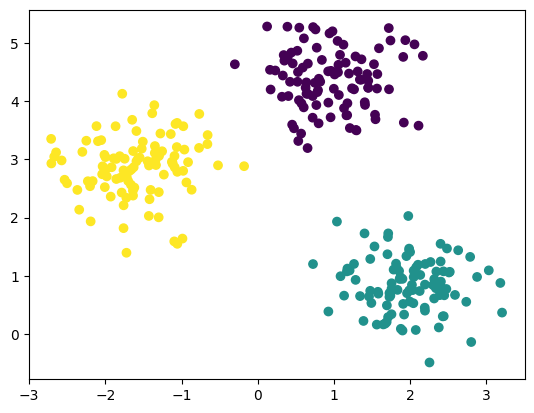

In [3]:
%matplotlib inline


nb_classes = 3
n_samples = 100

X, labels = make_blobs(n_samples=[n_samples, n_samples, n_samples], cluster_std= [0.5,0.5,0.5],\
                       centers=None, n_features=2, random_state = 0)
# example of scatterplot of the generated data
plt.figure()
plt.scatter(X[:,0],X[:,1], c = labels); # we use the labels to color the points

**First generate a train/test split by using the train_test_split function. We use two thirds of the data for training, and the rest for testing.**


In [4]:
# define training/test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=42) #the labels are the y of the function

We provide a function to show the decision boundary for any scikit learn model applied on any dataset

Explanation: we define a grid of data points enclosing the data. We use the function np.linspace to generate the extent of the grid in x and y, and the function meshgrid to define a grid of points from those two vectors.

Then we to apply a classifier on each of those grid points, using the method model.predict.

We can then display some contour lines of the generated function using the plt.contourf function.

A nice thing to do is to overlay this plot with a scatterplot of the data.

In [5]:
grid_size = 1000

x = np.linspace(-4,5,grid_size)
y = np.linspace(-1,6,grid_size)

def plot_decision_boundary(x,y,X,labels,model):

    # x and y are the vectors giving the extent of the 2D grid
    # X is the data
    # labels are the classification labels
    # model is any trained scikit-learn model
    [xx,yy] = np.meshgrid(x,y) # generate a grid of points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #
    Z = Z.reshape(grid_size,grid_size)
    plt.scatter(X[:,0],X[:,1], c = labels)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha = 0.6)

**Apply a simple Logistic Regression on the data using the LogisticRegression function.** Once a model is defined in scikit-learn, the training part is always the same:

If your model is called "model", the you can train the parameters using model().fit(X_train,y_train)

Another standard syntax is used for the computation of the classification accuracy: model.score(X_test_y_test)

**Use these to train the model and show the classification accuracy on both the training and testing sets. Show the decision boundaries that you obtain.**

Train accuracy: 1.0
Test accuracy:1.0


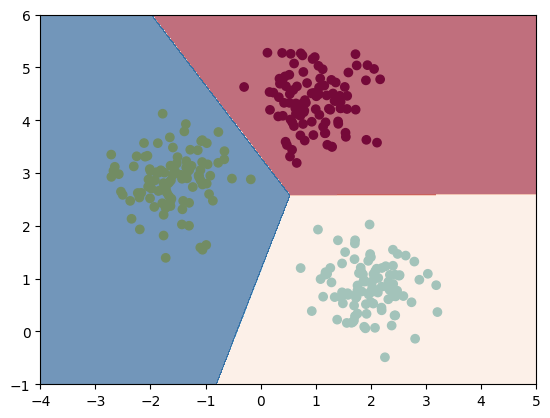

In [6]:
# Logistic regression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(f'Train accuracy: {clf.score(X_train,y_train)}')
print(f'Test accuracy:{clf.score(X_test,y_test)}')
plot_decision_boundary(x,y,X,labels,clf)


**Next, apply Support Vector Machines to the same dataset to compare performance qualitatively and quantitatively. Make sure to use the argument "kernel = 'linear'" for a fair comparison with Logistic Regression.**

**Compare the decision boundaries with those obtained with Logistic Regression. Explain.**

Hints:

-Multiclass SVM as implemented in scikit-learn uses the one vs one strategy.

-Logistic Regression uses K discriminant functions (a really multiclass classifier). It can be shown that with such classes, the regions of each class are always connected (no holes) et convex (any segment with endpoints in the region is entirely in the region).

**Bonus: show that regions defined by logistic regressions are always convex. Hint: Use the definition of a convex set and the inequality $p(C_k|x) \geq p(C_l|x)$ for any $x\in C_k$, and any $j\neq k$.**



1.0
1.0


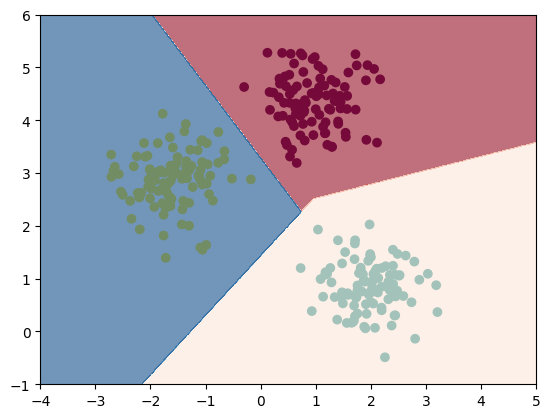

In [7]:
clf_2 = svm.SVC(kernel='linear')
clf_2.fit(X_train, y_train)
print(clf_2.score(X_train,y_train))
print(clf_2.score(X_test,y_test))
plot_decision_boundary(x,y,X,labels,clf_2)

**Comparision of decision boundaries**

**Qualitative:**


Logistic regression generates convex, linear and smooth decision boundaries (as observed). This occurs because it is a really multiclass classifier, which looks for maximizing the probability of a class given the input, what results in a connected-convex region for each class.


In the other hand, SVM uses one vs. one strategy, meaning it compares each pair of clusters iteratively. This leads (as observed) to more complex decision boundaries that depend on inter-class distributions and that in the multiclass context, will not always be inter connected.
It can be seen how the regions don't have a common endpoint.

**Quantitative:**


In this case, both methods had the exact same performance. This occured because data was linearly separable, but when this is not the case or when data is tightly packed, SVM is expected to outperform logistic regression.

**DEMONSTRATION:** Regions defined by logistic regressions are always convex

$p(C_k|x) \geq p(C_l|x)$ for any $x\in C_k$, and any $j\neq k$

In logistic regression,  a point 𝑥 belongs into one of 𝐾 classes by defining discriminant functions $𝑔𝑘(𝑥)$ for each class $𝐶𝑘$, where:

$𝑔_𝑘(𝑥)= 𝑤_𝑘𝑇_𝑥+𝑏_𝑘$

Here:

𝑤𝑘 is the weight vector for class 𝐶𝑘

𝑏𝑘 is the bias term for class 𝐶𝑘

𝑥 is the input feature vector

This is an affine function, affine functions are convex by definition.

The decision rule assigns a point 𝑥 to class 𝐶𝑘 if 𝑔𝑘(𝑥) is the largest discriminant function among all classes, which translates to
$x \in C_k \iff g_k(x) \geq g_j(x) \text{ for all } j \neq k$


Rewritting it as a set of inequalities:

$w_k^T x + b_k \geq w_j^T x + b_j \quad \forall j \neq k$

It can be rearranged as:

$(w_k - w_j)^T x \geq b_j - b_k \quad \forall j \neq k$

The region 𝐶𝑘 is defined by a set of linear inequalities. With each inequality representing a half-space, and the intersection of half-spaces is a convex set by definition.

Now, to determine the conveity of the region, it is necessary to prove that for x1, x2 ∈ Ck any $ \alpha \in [0, 1], \text{ the point } x_\alpha = \alpha x_1 + (1 - \alpha) x_2 \text{also belongs to Ck }​$.

x1, x2 ∈ Ck can be expressed as:

$(w_k - w_j)^T x_1 \geq b_j - b_k \quad \text{and} \quad (w_k - w_j)^T x_2 \geq b_j - b_k \quad \forall j \neq k$

And $ \alpha \in [0, 1], x_\alpha = \alpha x_1 + (1 - \alpha) x_2$:

$(w_k - w_j)^T x_\alpha = (w_k - w_j)^T (\alpha x_1 + (1 - \alpha) x_2)$

Expanding this expression:

$= \alpha (w_k - w_j)^T x_1 + (1 - \alpha) (w_k - w_j)^T x_2$

Since $(w_k - w_j)^T$ $x_1 > b_j - b_k$ and $(w_k - w_j)^T$ $x_2 > b_j - b_k$ :


$\alpha (w_k - w_j)^T x_1 + (1 - \alpha) (w_k - w_j)^T x_2 \geq \alpha (b_j - b_k) + (1 - \alpha) (b_j - b_k) = b_j - b_k$


Then,

$(w_k - w_j)^T x_\alpha \geq b_j - b_k \quad \text{for all } j \neq k$

meaning $𝑥_𝛼 ∈ 𝐶_𝑘$




**Find and display the support vectors on the same figure.**

[[ 2.11114739  3.57660449]
 [ 0.65446088  3.19208575]
 [ 0.4519936   3.59377836]
 [-0.30022483  4.63059663]
 [ 1.17732223  1.12313089]
 [ 1.97643401  2.02602541]
 [-0.66054342  3.26013281]
 [-0.17879199  2.88091993]
 [-0.76690658  3.77767692]]


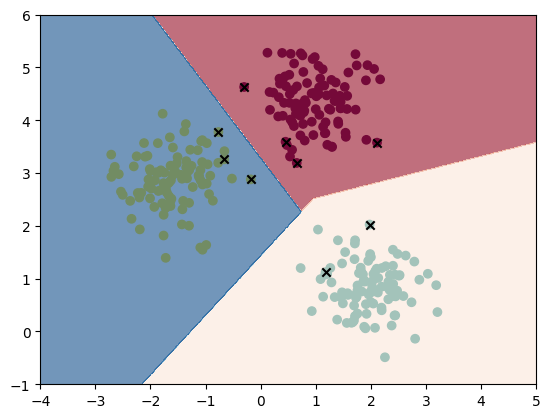

In [8]:
#Support vector machine
print(clf_2.support_vectors_)
plot_decision_boundary(x,y,X,labels,clf_2)
plt.scatter(clf_2.support_vectors_[:,0],clf_2.support_vectors_[:,1], marker = 'x', color = 'black')

# Second dataset: Concentric circles

Now we switch to another dataset with different properties: it is generated from two Gaussian distributions with the same mean but different covariance matrices. Then we assigned by hand all points close to the origin to class 2 to form the final dataset.

(2000, 2)


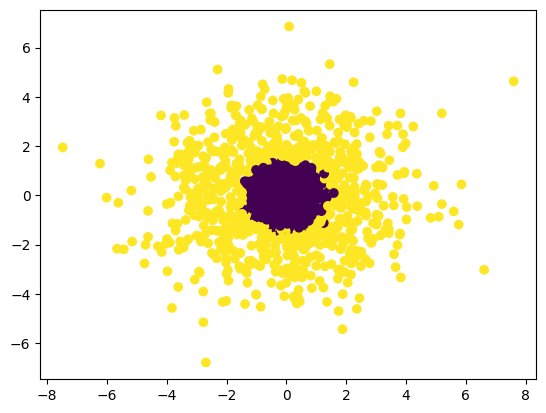

In [9]:
X, labels = make_blobs(n_samples=[1000, 1000], cluster_std= [0.5,2], centers=[[0,0],[0,0]], n_features=2, \
                  random_state = 0)

print(X.shape)

nb_classes = 2
n_samples = 1000

threshold = np.sqrt(2)

for i in range(n_samples*2):
    if np.sqrt(X[i,0]**2+X[i,1]**2) < threshold:
        labels[i] = 0

plt.figure()
plt.scatter(X[:,0],X[:,1], c = labels)
#print(labels)


**Generate a train/test split, and then use the exact same classification techniques as before to classify the dataset: Logistic Regression and linear SVM. Conclude on the efficiency of these methods. How do you explain it? Is there a good choice of $C$ (what is the role of this parameter?) for this dataset?**

In [10]:
# define training/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.33, random_state=42) #the labels are the y of the function

0.6037313432835821
0.603030303030303


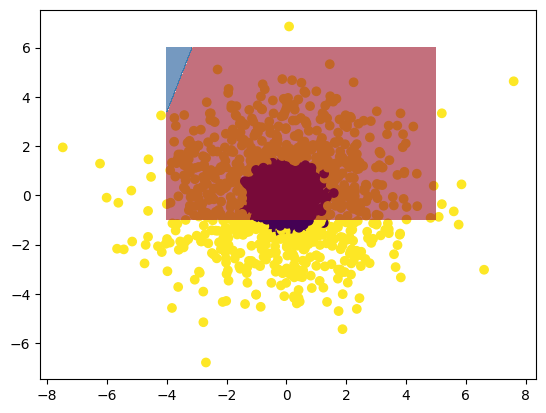

In [11]:
# Logistic regression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
plot_decision_boundary(x,y,X,labels,clf)

0.5992537313432836
0.603030303030303


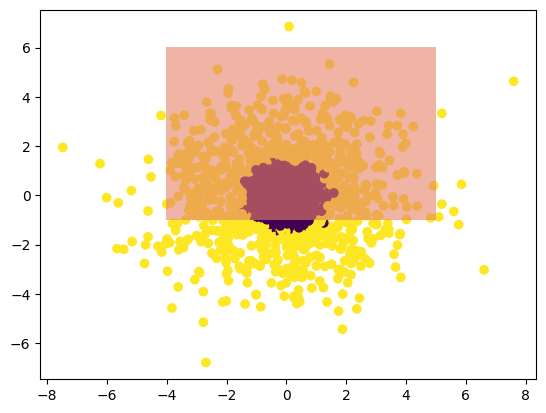

In [12]:
#Support vector machine
clf_2 = svm.SVC(kernel='linear')
clf_2.fit(X_train, y_train)
print(clf_2.score(X_train,y_train))
print(clf_2.score(X_test,y_test))
plot_decision_boundary(x,y,X,labels,clf_2)



*   **Conclude on the efficiency of these methods. How do you explain it?**


The methods are not so efficient in this case. It can be observed that both of them are trying to separate the data with a linear classifier in a case where this is not possible. That's why we see such drop in accuracy.



*   **Is there a good choice of $C$ (what is the role of this parameter?) for this dataset?**


The 𝐶 parameter in both models controls regularization strength. When it is low, data can be more generalized, reducing chances of overfitting and when is high, it captures better detail in data but at the risks of overfitting.
In both cases, there is no value of 𝐶 that gets to achieve good classification accuracy because of the models' linear nature that still wont capture the radial pattern in data and make a classifier according to it.



  

### **Now change the "kernel" parameter of SVM. You can try the Gaussian one and the polynomial ones with various degrees (check documentation for details on what to change).**



0.9917910447761195
0.9833333333333333


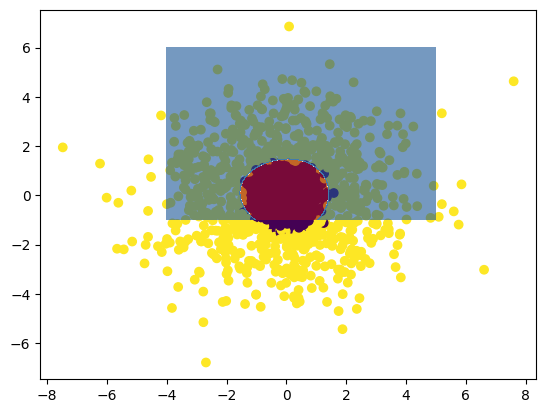

In [13]:
#SVM with gaussian kernel
clf_2 = svm.SVC(kernel='rbf') #rbf stands for Radial Basis Function
clf_2.fit(X_train, y_train)
print(clf_2.score(X_train,y_train))
print(clf_2.score(X_test,y_test))
plot_decision_boundary(x,y,X,labels,clf_2)

0.982089552238806
0.9818181818181818


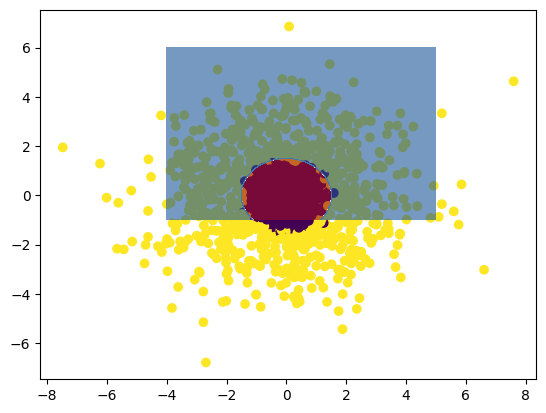

In [14]:
#SVM with polynomial kernel degree 2
clf_2 = svm.SVC(kernel='poly', degree=2) #rbf stands for Radial Basis Function
clf_2.fit(X_train, y_train)
print(clf_2.score(X_train,y_train))
print(clf_2.score(X_test,y_test))
plot_decision_boundary(x,y,X,labels,clf_2)

0.6358208955223881
0.6287878787878788


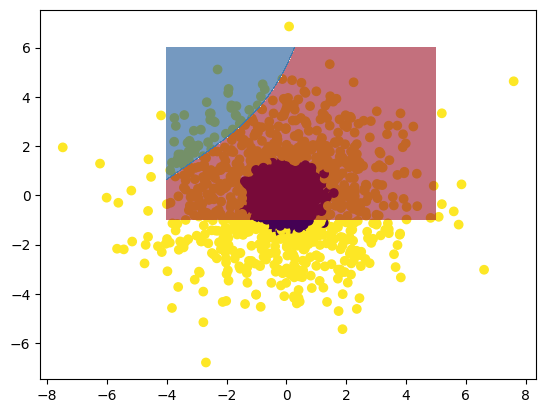

In [15]:
#SVM with polynomial kernel degree 3
clf_2 = svm.SVC(kernel='poly', degree=3) #rbf stands for Radial Basis Function
clf_2.fit(X_train, y_train)
print(clf_2.score(X_train,y_train))
print(clf_2.score(X_test,y_test))
plot_decision_boundary(x,y,X,labels,clf_2)

0.9791044776119403
0.9742424242424242


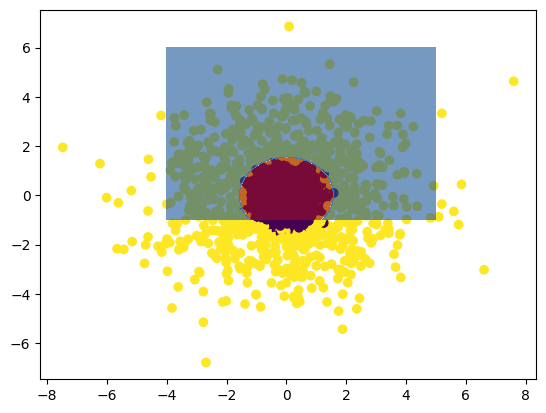

In [16]:
#SVM with polynomial kernel degree 4
clf_2 = svm.SVC(kernel='poly', degree=4) #rbf stands for Radial Basis Function
clf_2.fit(X_train, y_train)
print(clf_2.score(X_train,y_train))
print(clf_2.score(X_test,y_test))
plot_decision_boundary(x,y,X,labels,clf_2)

0.9537313432835821
0.9393939393939394


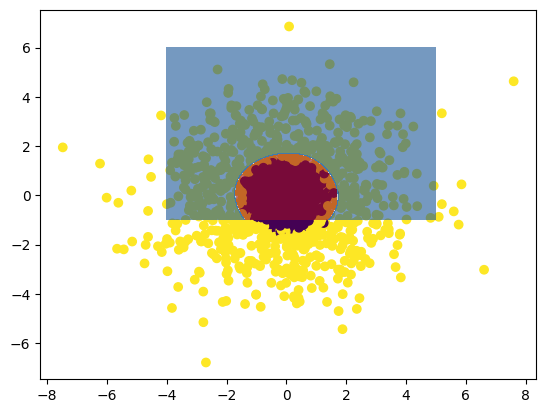

In [17]:
#SVM with polynomial kernel degree 8
clf_2 = svm.SVC(kernel='poly', degree=8) #rbf stands for Radial Basis Function
clf_2.fit(X_train, y_train)
print(clf_2.score(X_train,y_train))
print(clf_2.score(X_test,y_test))
plot_decision_boundary(x,y,X,labels,clf_2)

**Does this fix the issues of the previous methods? Why?**

Yes. Because the kernel in SVM, allows to project data in a different space where it may be linearlly separable and then projecting the hyperplane in the original space where it is not linear, allowing it to separate data with non-linear patterns like this.


**What is a good choice of degree for the polynomial kernel?**

A good choice of degree will always be an even number. Because all of them resemble a quadratic polynomial function which creates a decision boundary that curves in a way that matches the natural structure of the data. Degree **2** captured this without adding unnecessary complexity.

Choosing an odd degree (like 3) might work for some data types, but here, it doesn’t suit the symmetrical pattern of this dataset as it was observed.

### The polynomial kernel working for some well chosen degrees suggests that nice transformations of the features can make the problem easier.

**Generate a dataset adding a third feature which is simply the distance from every point to the origin. Apply both linear SVM and Logistic regression to this new data. Conclude on why doing this helps.**

You will need to update the "plot decision boundary" function to be applicable to inputs with the new added features (one line to modify).

**Bonus: represent the 3D feature space with the added feature, and explain why the situation gets better there for linear classifiers. Connect with the results of SVM with a polynomial kernel of the previous dataset.**

The vector X has the coordinates [x,y] of each point so the first column is x, second column is y


The distances to the origin are calculated as the √(x^2+y^2)

In [18]:
X, labels = make_blobs(n_samples=[1000, 1000], cluster_std= [0.5,2], centers=[[0,0],[0,0]], n_features=2, \
                  random_state = 0)

# Calculate distances to the origin

distances = np.sqrt(X[:, 0]**2 + X[:, 1]**2)

# Reshape distances to be a column vector
distances = distances.reshape(-1, 1)

# Add the distances as a new feature to the dataset
X_extended = np.hstack((X, distances))

In [19]:
def plot_decision_boundary_new(x,y,X,labels,model):

    # x and y are the vectors giving the extent of the 2D grid
    # X is the data
    # labels are the classification labels
    # model is any trained scikit-learn model
    [xx,yy] = np.meshgrid(x,y) # generate a grid of points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.sqrt(xx.ravel()**2+yy.ravel()**2)]) #ravel is used to convert a multi-dimensional array into a one-dimensional array
    Z = Z.reshape(grid_size,grid_size)
    plt.scatter(X[:,0],X[:,1], c = labels)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha = 0.6)

In [20]:
# define training/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_extended, labels, test_size=0.33, random_state=42) #the labels are the y of the function

0.8985074626865671
0.9030303030303031


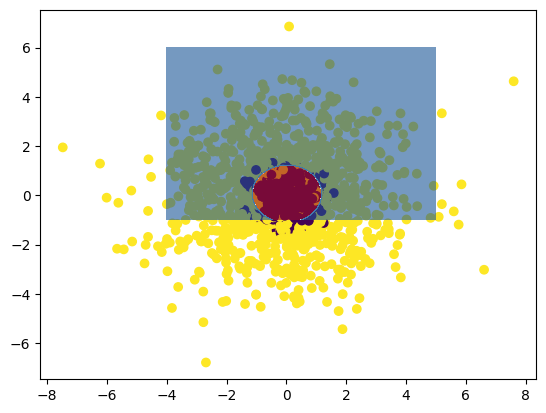

In [21]:
# Logistic regression

clf = LogisticRegression()
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
plot_decision_boundary_new(x,y,X,labels,clf)

It works better with the third dimension because it allows to separate my data in a inear way using the distance

**Plotting the 3D feature space**

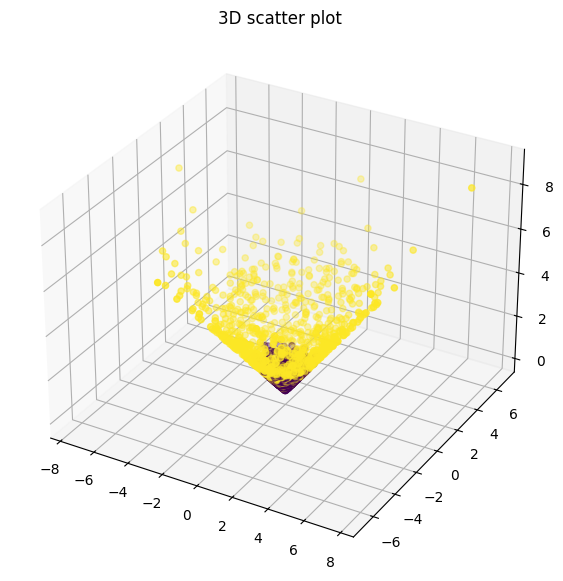

In [22]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(X_extended[:, 0], X_extended[:, 1], X_extended[:, 2], c = labels)
plt.title("3D scatter plot")

# show plot
plt.show()

# Application to a simple real dataset: the Iris dataset

According to scikit-learn:



This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.



In [23]:
iris = datasets.load_iris()

X = iris.data  # we only take the first two features.
y = iris.target #tags with the three different types of flower


**Plot a few combinations of variables in 2D (and 3D if you want). Based on this plot, how do you evaluate the difficulty of the classification problem?**

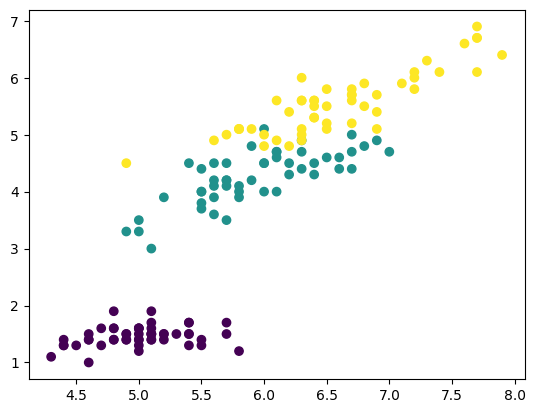

In [24]:
plt.figure()
#Plot two features
plt.scatter(X[:,0],X[:,2], c = y); # we use the labels to color the points

**How do you evaluate the difficulty of the classification problem?**

The classification problem is not difficult because the data is segregated by flower type. The purple group can be perfectly separated from the rest using a linear classifier. Nevertheless, between the green and the yellow group there is  a small degree of mixture, therefore a high performance is expected with both algorithms but not necessarily with a perfect separation capacity.

**Generate a train test split for this dataset and classify the dataset with both techniques. Conclude.**

Train/test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [0, 2]], y, test_size=0.33, random_state=42)

Logistic regression

Train accuracy: 0.94
Test accuracy:1.0


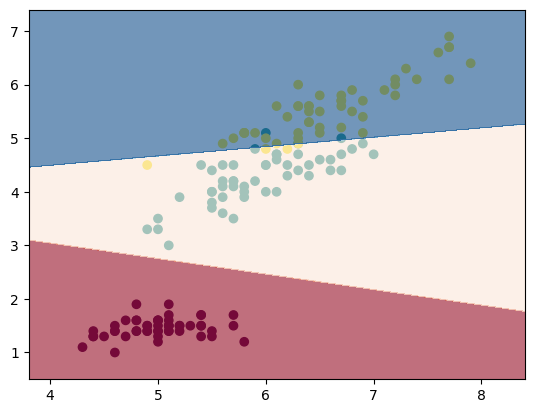

In [26]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(f'Train accuracy: {clf.score(X_train,y_train)}')
print(f'Test accuracy:{clf.score(X_test,y_test)}')

#It is necessary to modify the grid for properly plotting the boundaries over the new data
grid_size = 1500

x_min = min(X[:,0])-0.5
x_max = max(X[:,0])+0.5
y_min = min(X[:,2])-0.5
y_max = max(X[:,2])+0.5
x_grid = np.linspace(x_min,x_max,grid_size)
y_grid = np.linspace(y_min,y_max,grid_size)

plot_decision_boundary(x_grid,y_grid,X[:, [0, 2]],y,clf)

It can be observed that logistic regression, because of its linear nature had a perfect separation capacity, reaching a score of 1 for the test set. The reason why it happened in the test but not in the training set can be due to the testing samples being far from the boundary/"mixing area" between the yellow and green groups, which didn't happen for the training samples.

SVM with linear kernel

0.95
0.98


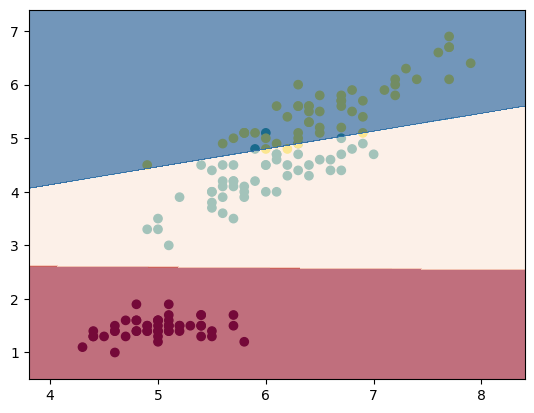

In [27]:
clf_2 = svm.SVC(kernel='linear')
clf_2.fit(X_train, y_train)
print(clf_2.score(X_train,y_train))
print(clf_2.score(X_test,y_test))
plot_decision_boundary(x_grid,y_grid,X[:, [0, 2]],y,clf_2)

SVM had similar performance but a slightly higher training but lower testing accuracy. As it depends more on the groups distribution, its boundary separated the green and yellow groups with a slightly different boundar that lead to this mismatch.

# Final Task: challenge on Covtype data

 We consider a dataset called cover type, whih aims at classifying the cover type of different locations on Earth based on a large number of predictors (measurements carried out on-site). Features can be numerical or categorical. They include local elevation, slope, distance to hydrology, orientation, average illumination, but also presence or not of different elements in the soil. There are 7 different types of forest cover that are to be classified, based on more than 500k data points. In this lab, we will only use 10% of it in total. All the information on the data can be found here:

https://archive.ics.uci.edu/ml/datasets/covertype

The data has $d = 54$ features, and there are $K = 7$ classes.

Below we read the data from the .csv file and generate a train/val/test split

In [28]:
#A zip file with the dataset was stored in google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
!unzip '/content/drive/MyDrive/covtype.zip'

Archive:  /content/drive/MyDrive/covtype.zip
replace covtype.data? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: covtype.data            


In [30]:
# reading data

import csv

with open('covtype.data', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    rows = []
    for row in reader:
        rows.append(row)


In [31]:
# formatting data

N = len(rows) # number of samples
d = len(rows[0])-1 # number of attributes = len(rows[0])-1

nb_features = d

print(N)
print(d)

K = 7 # 7 classes

data = np.zeros((N,d+1))

for i in range(N):
    data[i,:] = np.array([float(j) for j in rows[i]])


x = data[:,:nb_features] # model inputs

y = np.array([int(idx) for idx in data[:,-1]])-1# last column gives the class (stored as integers)

581012
54


In [32]:
# train val test split

n = int(N/100) # using only 1% of the data

print(n)

# generate a random train/val/test split

perm = np.random.permutation(N)

x_small = x[perm[:n],:]
y_small = y[perm[:n]]

proportions = [0.4,0.4,0.2] # train/val/test

x_train = x_small[:int(n*proportions[0]),:]
x_val = x_small[int(n*proportions[0])+1:int(n*proportions[0])+int(n*proportions[1]),:]
x_test = x_small[(int(n*proportions[0])+int(n*proportions[1])):,:]

y_train = y_small[:int(n*proportions[0])]
y_val = y_small[int(n*proportions[0])+1:int(n*proportions[0])+int(n*proportions[1])]
y_test = y_small[(int(n*proportions[0])+int(n*proportions[1])):]

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

print(y_train)

5810
(2324, 54)
(2323, 54)
(1162, 54)
(2324,)
(2323,)
(1162,)
[1 1 0 ... 0 1 1]


**Your task is to use Logistic Regression and SVM and find the best classifier on the validation data by tuning hyperparameters. Once you are satisfied with your model, try it on the test data to check if it generalizes. You can use share your splits with other groups to compete with eachother.**

**Logistic regression**

In [33]:
# Logistic regression
clf = LogisticRegression(random_state=0,max_iter=10000).fit(x_train, y_train)
print(f'Train accuracy: {clf.score(x_train,y_train)}')
print(f'Test accuracy:{clf.score(x_test,y_test)}')

Train accuracy: 0.7018072289156626
Test accuracy:0.7168674698795181


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


To help the model to converge, the data will be standardized. In the Optimization 1 course it was seen that scaling data helps with this by ensuring that all features contribute proportionately and thus helping the optimization process

In [34]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [35]:
# Logistic regression
clf = LogisticRegression(random_state=0,max_iter=10000).fit(x_train, y_train)
print(f'Train accuracy: {clf.score(x_train,y_train)}')
print(f'Test accuracy:{clf.score(x_test,y_test)}')

Train accuracy: 0.7271944922547332
Test accuracy:0.7392426850258176


In [36]:
print(f'Validation accuracy: {clf.score(x_val,y_val)}')

Validation accuracy: 0.720619888075764


**SVM**

To solve this task I'm going to use a method called GridSearch, which is going to help me finding the best hyperparameters among all the options seen in this TP.

For ensuring generalization before testing it, I will use 5-folds cross validation.

In [37]:
# Set up the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],       # Kernel types
    'degree': [2, 3, 4]                       # Only relevant for 'poly' kernel
}

svm = svm.SVC()

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)



Best Parameters: {'degree': 2, 'kernel': 'linear'}
Best Estimator: SVC(degree=2, kernel='linear')


**On train/test data**

In [38]:
best_estimator.fit(x_train, y_train)
print(best_estimator.score(x_train,y_train))
print(best_estimator.score(x_test,y_test))

0.7314974182444062
0.7366609294320138


**On validation data**

In [39]:
# Evaluate on validation data
best_estimator.score(x_val,y_val)

0.7382694791218253

**Some observations:**

The results from GridSearch were expected because Logistic Regression, being a linear classifier had a decent accuracy, so data was inherently linearly separable.

The best estimator overall was SVC(degree=2, kernel='linear') with an accuracy of 0.738 in the validation set. (degree =2 is an ignored parameter given kernel=linear).

Results were similar in training, testing and validation so there's no overfitting thus no regularization needed.

Standardizing data was crucial for fast convergence in both cases.

Adding the distance to the origin was tried but didn't improve results.